- 코드 출처 : https://opencv-python.readthedocs.io/en/latest/index.html

In [77]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

# 이미지 처리 (Image Processing)

- 필요에 따라 적절한 처리

- `resize()`, `flip()`, `getAffineTransform()`, `warpAffine()` 등 다양한 메서드 존재

## Resize

- `cv2.resize()`
  - 사이즈가 변하면 pixel사이의 값을 결정을 해야함
  
  - 보간법(Interpolation method)
    - 사이즈를 줄일 때 : `cv2.INTER_AREA`
    
    - 사이즈를 크게 할 때 : `cv2.INTER_CUBIC` , `cv2.INTER_LINEAR`

  - `Parameters`
    - `img` : Image

    - `dsize` : Manual Size. 가로, 세로 형태의 tuple(ex; (100,200))

    - `fx` : 가로 사이즈의 배수. 2배로 크게하려면 2. 반으로 줄이려면 0.5

    - `fy` : 세로 사이즈의 배수

    - `interpolation` : 보간법

![](https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png)

* https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png

In [78]:
origin_img = cv2.imread('./img/Lenna_512.png')

origin_img.shape

(512, 512, 3)

In [79]:
img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)

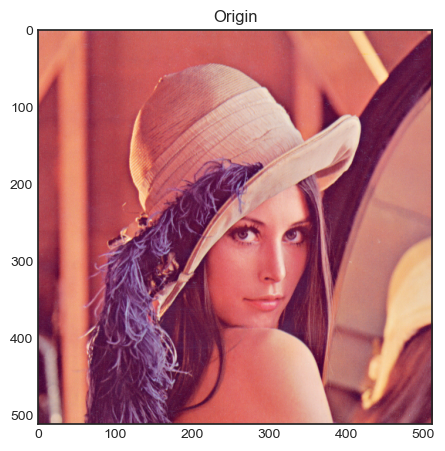

In [80]:
height, width = img.shape[:2]

plt.figure(figsize=(width/100, height/100))
plt.imshow(img)
plt.title('Origin')
plt.show()

In [81]:
shrink = cv2.resize(img, None, fx=.5, fy=.5, interpolation=cv2.INTER_AREA)
expand_1 = cv2.resize(img, (width * 2, height * 2), interpolation=cv2.INTER_CUBIC)
expand_2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

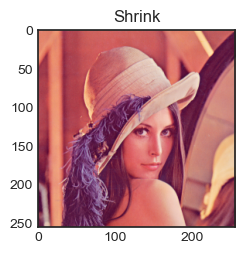

In [82]:
height, width = shrink.shape[:2]

plt.figure(figsize=(width/100, height/100))
plt.imshow(shrink)
plt.title('Shrink')
plt.show()

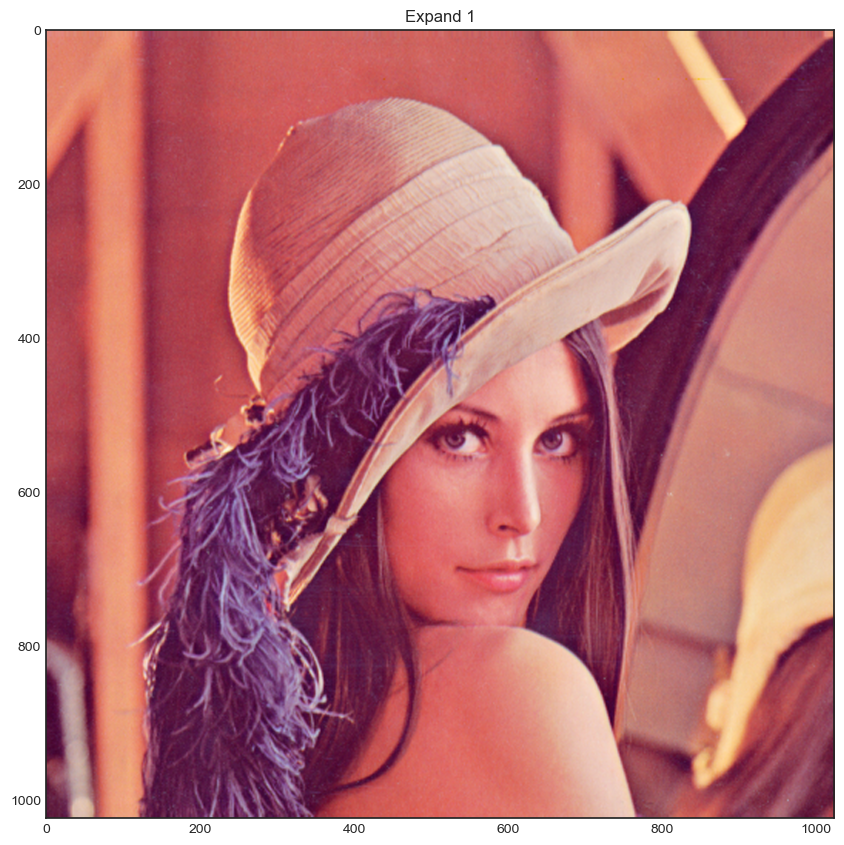

In [83]:
height, width = expand_1.shape[:2]

plt.figure(figsize=(width/100, height/100))
plt.imshow(expand_1)
plt.title('Expand 1')
plt.show()

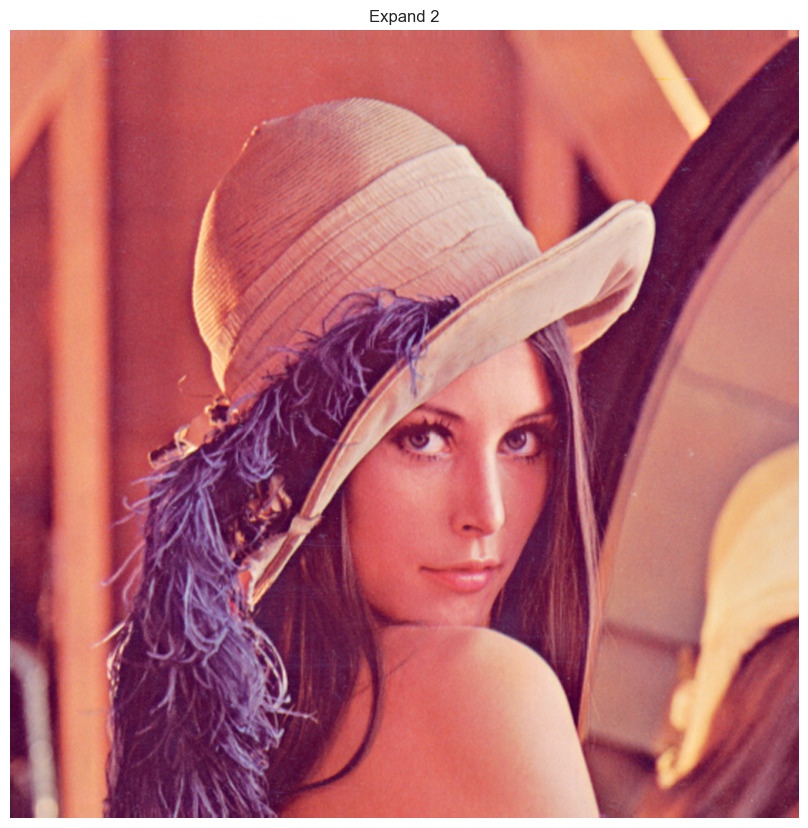

In [84]:
height, width = expand_2.shape[:2]

plt.figure(figsize=(width/100, height/100))
plt.imshow(expand_2)
plt.axis('off')
plt.title('Expand 2')
plt.show()

## Translation

- 이미지의 위치를 변경

- `cv2.warpAffine()`

  - `Parameters`
    - `src` : Image
    
    - `M` : 변환 행렬

    - `dsize` (tuple) : output image size(ex; (width=columns, height=rows)


In [85]:
rows, cols = img.shape[:2]

M = np.array([
    [1, 0, 10],
    [0, 1, 20]
], np.float32)
dst = cv2.warpAffine(img, M, (cols, rows))

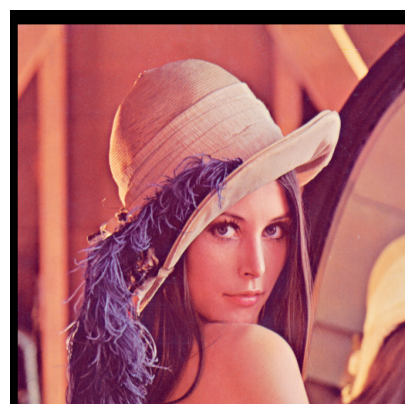

In [86]:
plt.figure(figsize=(rows/100, cols/100))
plt.imshow(dst)
plt.axis('off')
plt.show()

## Rotate

- 물체를 평면상의 한 점을 중심으로 𝜃 만큼 회전하는 변환

- 양의 각도는 시계반대방향으로 회전

- `cv2.getRotationMatrix2D()`
  
  - `Parameters`

    - `center` : 이미지의 중심 좌표
    
    - `angle` : 회전 각도

    - `scale` : scale factor

In [87]:
img.shape

(512, 512, 3)

In [88]:
rows, cols = img.shape[:2]

M = cv2.getRotationMatrix2D((cols/2, rows/2), 60, .5)
dst = cv2.warpAffine(img, M, (cols, rows))

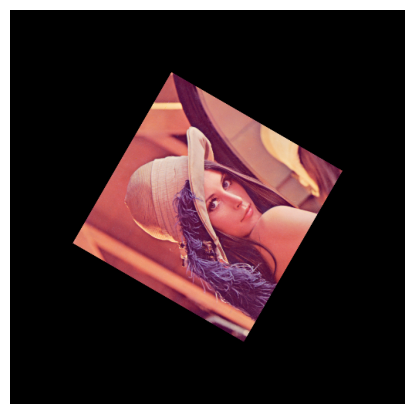

In [89]:
plt.figure(figsize=(rows/100, cols/100))
plt.imshow(dst)
plt.axis('off')
plt.show()

## Flip

- 대칭 변환
  - 좌우 대칭 (좌우 반전)

  - 상하 대칭 (상하 반전)

- 입력 영상과 출력 영상의 픽셀이 1:1 매칭이므로 보간법이 필요 없음

- `cv2.flip()`

  - Parameters

    - `src` : 입력 영상

    - `flipCode` : 대칭 방법을 결정하는 flag 인자

      - 양수이면 좌우 대칭

      - 0이면 상하 대칭

      - 음수이면 상하, 좌우 대칭을 모두 실행

In [90]:
img = cv2.imread('./img/Lenna_512.png')

img.shape

(512, 512, 3)

In [91]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

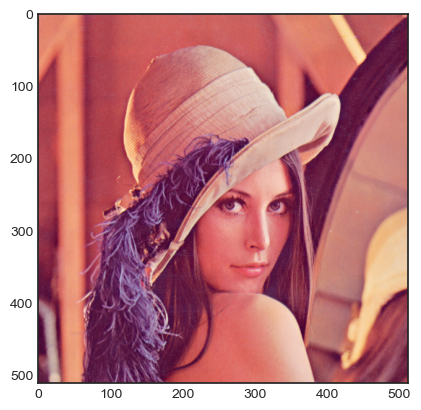

In [92]:
plt.imshow(img)
plt.show()

In [94]:
res_1 = cv2.flip(img, 1)

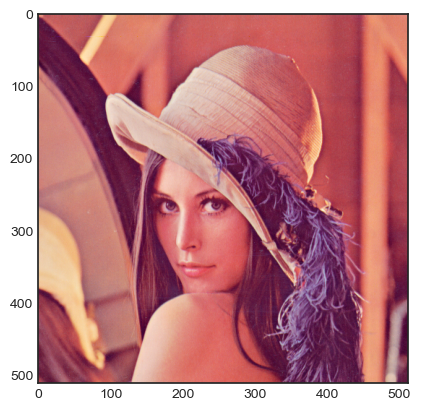

In [95]:
plt.imshow(res_1)
plt.show()

In [96]:
res_2 = cv2.flip(img, 0)

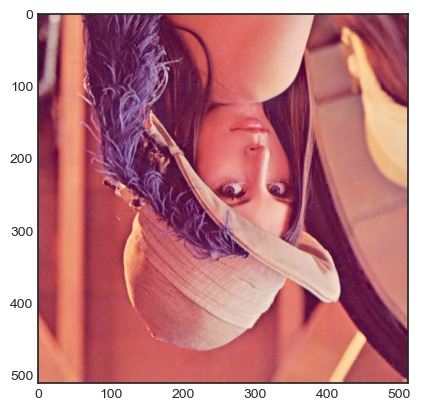

In [97]:
plt.imshow(res_2)
plt.show()

In [100]:
res_3 = cv2.flip(img, -1)

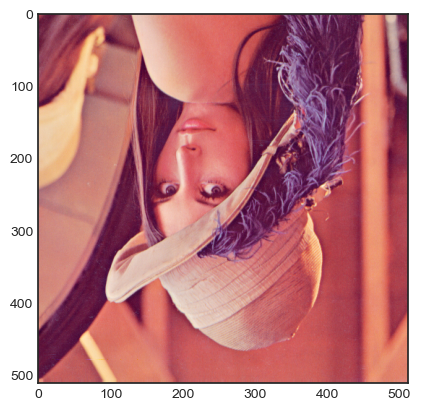

In [101]:
plt.imshow(res_3)
plt.show()

## Affine Transformation

- 선의 평행선은 유지되면서 이미지를 변환하는 작업

- 이동, 확대, Scale, 반전까지 포함된 변환

- `cv2.getAffineTransform()`

  - Affine 변환을 위해서는 3개의 Match가 되는 점이 있으면 변환행렬을 구할 수 있음

In [104]:
rows, cols, ch = img.shape

pt_1 = np.array([
    [200, 100],
    [400, 100],
    [200, 200]
], np.float32)
pt_2 = np.array([
    [200, 300],
    [400, 200],
    [200, 400]
], np.float32)

cv2.circle(img, (200, 100), 10, (255, 0, 0,), -1)
cv2.circle(img, (400, 100), 10, (0, 255, 0), -1)
cv2.circle(img, (200, 200), 10, (0, 0, 255), -1)

M = cv2.getAffineTransform(pt_1, pt_2)

dst = cv2.warpAffine(img, M, (cols, rows))

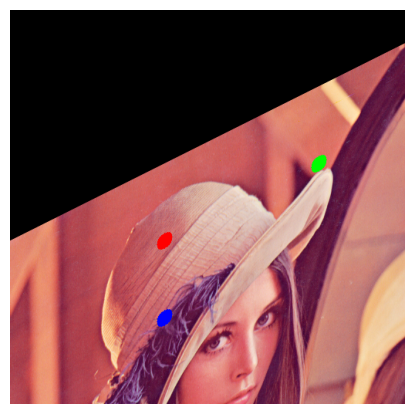

In [108]:
plt.figure(figsize=(rows/100, cols/100))
plt.imshow(dst)
plt.axis('off')
plt.show()

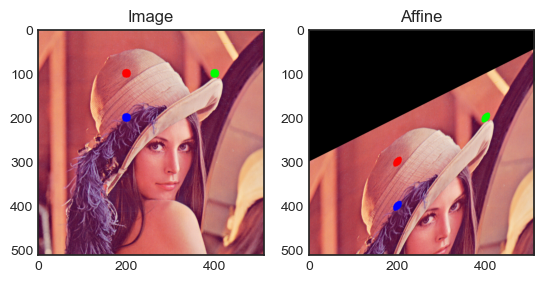

In [110]:
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Image')

plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.title('Affine')

plt.show()

## Perspective Transformation

- Perspective(원근법) 변환

- 직선의 성질만 유지, 선의 평행성은 유지가 되지 않는 변환

- 기차길은 서로 평행하지만 원근변환을 거치면 평행성은 유지 되지 못하고 하나의 점에서 만나는 것 처럼 보임 (반대의 변환도 가능)

- 4개의 Point의 Input값과 이동할 output Point 가 필요

- `cv2.getPerspectiveTransform()`가 필요하며, `cv2.warpPerspective()` 함수에 변환행렬값을 적용하여 최종 결과 이미지를 얻을 수 있음


- train.jpg

  <img src="https://cdn.pixabay.com/photo/2015/04/04/06/54/train-706219_960_720.jpg" width="200">

  <sub>[이미지 출처] https://pixabay.com/ko/photos/%EA%B8%B0%EC%B0%A8-%EA%B8%B0%EC%B0%A8%EA%B8%B8-%EA%B0%88%EB%A6%BC%EA%B8%B8-706219/</sub>

In [111]:
train = cv2.imread('./img/train.jpg')

In [112]:
train.shape

(640, 428, 3)

In [115]:
cv2.imshow('train', train)
cv2.waitKey(0)
cv2.destroyAllWindows()

- 좌표점은 `왼쪽 위 -> 오른쪽 위 -> 오른쪽 아래 -> 왼쪽 아래`

In [120]:
top_left = (130, 300)
top_right = (270, 300)
bottom_right = (400, 550)
bottom_left = (30, 550)

pt_1 = np.array([top_left, top_right, bottom_right, bottom_left], np.float32)

w1 = abs(bottom_right[0] - bottom_left[0])
w2 = abs(top_right[0] - top_left[0])
h1 = abs(top_right[1] - bottom_right[1])
h2 = abs(top_left[1] - bottom_left[1])

max_width = max([w1, w2])
max_height = max([h1, h2])

pt_2 = np.array([
    [0, 0],
    [max_width - 1, 0],
    [max_width - 1, max_height - 1],
    [0, max_height - 1]
], np.float32)

In [121]:
cv2.circle(train, top_left, 10, (255, 0, 0), -1)
cv2.circle(train, top_right, 10, (0, 255, 0), -1)
cv2.circle(train, bottom_right, 10, (0, 0, 255), -1)
cv2.circle(train, bottom_left, 10, (0, 0, 0), -1)

array([[[244, 232, 226],
        [244, 232, 226],
        [244, 232, 226],
        ...,
        [228, 210, 199],
        [228, 210, 199],
        [228, 210, 199]],

       [[244, 232, 226],
        [244, 232, 226],
        [244, 232, 226],
        ...,
        [229, 211, 200],
        [228, 210, 199],
        [228, 210, 199]],

       [[244, 232, 226],
        [244, 232, 226],
        [244, 232, 226],
        ...,
        [229, 211, 200],
        [228, 210, 199],
        [228, 210, 199]],

       ...,

       [[ 48,  69,  90],
        [ 45,  66,  87],
        [ 43,  65,  83],
        ...,
        [ 69,  94, 120],
        [ 65,  90, 116],
        [ 63,  87, 111]],

       [[ 46,  67,  88],
        [ 46,  67,  88],
        [ 43,  65,  83],
        ...,
        [ 68,  95, 122],
        [ 66,  91, 117],
        [ 61,  86, 112]],

       [[ 43,  64,  85],
        [ 45,  67,  85],
        [ 43,  65,  83],
        ...,
        [ 68,  97, 124],
        [ 67,  91, 119],
        [ 63,  88, 114]]

In [122]:
cv2.imshow('', train)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [123]:
M = cv2.getPerspectiveTransform(pt_1, pt_2)
dst = cv2.warpPerspective(train, M, (max_width, max_height))

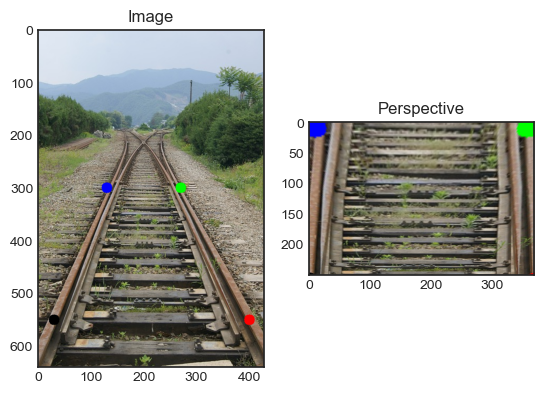

In [124]:
plt.subplot(1, 2, 1)
plt.imshow(train[:, :, ::-1])
plt.title('Image')

plt.subplot(1, 2, 2)
plt.imshow(dst[:, :, ::-1])
plt.title('Perspective')

plt.show()